## Spring 2021 CS 4641\7641 A: Machine Learning Homework 3

## Instructor: Dr. Mahdi Roozbahani

## Deadline: Apr 1st, Thursday, AOE

* Late submission will receive 0 credit. 

* Discussion is encouraged on Piazza as part of the Q/A. However, all assignments should be completed individually.

## Instructions for the assignment

- In this assignment, we have programming and writing questions.
- To switch between cell for code and for markdown, see the menu -> Cell -> Cell Type
- Typing with LaTeX is required for all the written questions, and can be done in markdown cell types. Handwritten answers will not be accepted. 
- If a question requires a picture, you could use this syntax $"<img src="" style="width: 300px;"/>"$ to include them within your ipython notebook.
- Questions marked with <span style="color:blue">**[P]**</span> are programming only and should be submitted to the autograder. Questions marked with <span style="color:green">**[W]**</span> may require that you code a small function or generate plots, but should **NOT** be submitted to the autograder. It should be submitted on the written portion of the assignment on gradescope
- The outline of the assignment is as follows:
    * Q1 [30 pts] > Image compression with SVD <span style="color:green">**[W]** 1.2 and 1.3 </span>| <span style="color:blue">**[P]** items 1.1 </span>
    * Q2 [15 pts] > Understanding PCA <span style="color:green">**[W]** items 2.2 </span>| <span style="color:blue">**[P]** 2.1 </span>
    * Q3 [60+(20 bonus for undergrads)]> Regression and regularization <span style="color:green">**[W]** items 3.2, 3.3, 3.4 ,3.5 and 3.6 </span>| <span style="color:blue">**[P]** items 3.1 </span>
    * Q4 [25 pts] > Naive Bayes classification. <span style="color:green">**[W]** items 4.1 </span>| <span style="color:blue">**[P]** items 4.2 </span>
    * Q5 [15 pts] > Noise in PCA and Linear Regression. <span style="color:green">**[W]** item 5.3 </span>| <span style="color:blue">**[P]** items 5.1 and 5.2 </span>
    * Q6 [Bonus for all][25 pts] > Feature Selection. <span style="color:green">**[W]** items 6.2 </span>| <span style="color:blue">**[P]** items 6.1 </span>

<strong>Bonus for undergrads in Q3</strong>: For undergraduate students, you are required to implement the closed form for linear regression and for ridge regression, the other 4 methods are bonus questions. <strong>For graduate students, you are required to implement all of them.</strong>


## Using the autograder

- Undergrad students will find four assignments on Gradescope that correspond to HW3: "HW3 - Programming", "HW3 - Programming (Bonus)", "HW3 - Programming (Bonus for all)", and "HW3 - Non-programming".
- Graduate students will find three assignments on Gradescope that correspond to HW3: "HW3 - Programming", "HW3 - Programming (Bonus for all)", and "HW3 - Non-programming".
- You will submit your code for the autograder on "HW3 - Programming" in the following format:

    * imgcompression.py
    * pca.py
    * regression.py
    * nb.py
    * slope.py
    * feature_selection.py

- All you will have to do is implement the classes "ImgCompression", "PCA", "Regression", "NaiveBayes", "Slope", "FeatureSelection" in the respective files. We have provided you different .py files and added libraries in those files. Please DO NOT remove those lines and add your code after those lines. Note that these are the only allowed libraries that you can use for the homework.

- You are allowed to make as many submissions until the deadline as you like. Additionally, note that the autograder tests each function separately, therefore it can serve as a useful tool to help you debug your code if you are not sure of what part of your implementation might have an issue.

- **For the "HW3 - Non-programming" part, you will download your jupyter notebook as HTML, print it as a PDF from your browser and submit it on Gradescope. To download the notebook as html, click on "File" on the top left corner of this page and select "Download as > HTML". The non-programming part corresponds to Q1.2 - 1.3, Q2.2, Q3.2 - 3.6, Q4.1, Q5.3 and Q6.2. For questions that include images include both your response and the generated images in your submission**

In [1]:
# HELPER CELL, DO NOT MODIFY
# This is cell which sets up some of the modules you might need 
# Please do not change the cell or import any additional packages. 

import numpy as np
import json
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction import text
from sklearn.datasets import load_boston, load_diabetes, load_digits, load_breast_cancer, load_iris, load_wine
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

## 1. Image compression with SVD [30 pts]  <span style="color:blue">**[P]**</span>  <span style="color:green">**[W]**</span>


### Load images data and plot


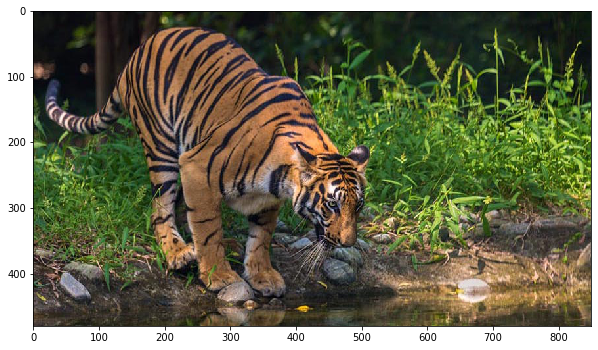

In [2]:
# HELPER CELL, DO NOT MODIFY
# load Image
image = plt.imread("/Users/maggiebrown/ML_Spring2021/Assignments/HW3/data/hw3_image_2.jpg")/255
#plot image
fig = plt.figure(figsize=(10,10))
plt.imshow(image)

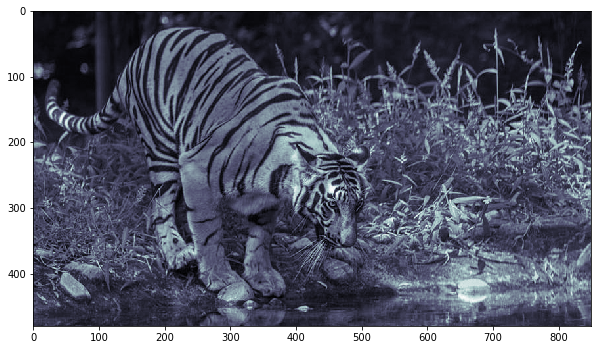

In [3]:
# HELPER CELL, DO NOT MODIFY
def rgb2gray(rgb):   
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

fig = plt.figure(figsize=(10, 10))
# plot several images
plt.imshow(rgb2gray(image), cmap=plt.cm.bone)

### 1.1 Image compression [20pts]  <span style="color:blue">**[P]**</span>

SVD is a dimensionality reduction technique that allows us to compress images by throwing away the least important information.  

Higher singular values capture greater variance and thus capture greater information from the corresponding singular vector. To perform image compression, apply SVD on each matrix and get rid of the small singular values to compress the image. The loss of information through this process is negligible and the difference between the images can hardly be spotted. For example, the variance captured by the first component $$\frac{\sigma_1}{\sum_{i=1}^n \sigma_i}$$ where $\sigma_i$ is the $i^{th}$ singular value. 

#### In the <strong>ImageCompression.py</strong> file, complete the svd, rebuild_svd, compression_ratio, and recovered_variance_proportion functions.

**Hint 1:** http://timbaumann.info/svd-image-compression-demo/ is an useful article on image compression.

### 1.2 Black and white [5 pts] <span style="color:green">**[W]**</span>
Use your implementation to generate a set of images compressed to different degrees. Include the images in your non-programming submission of the assignment.

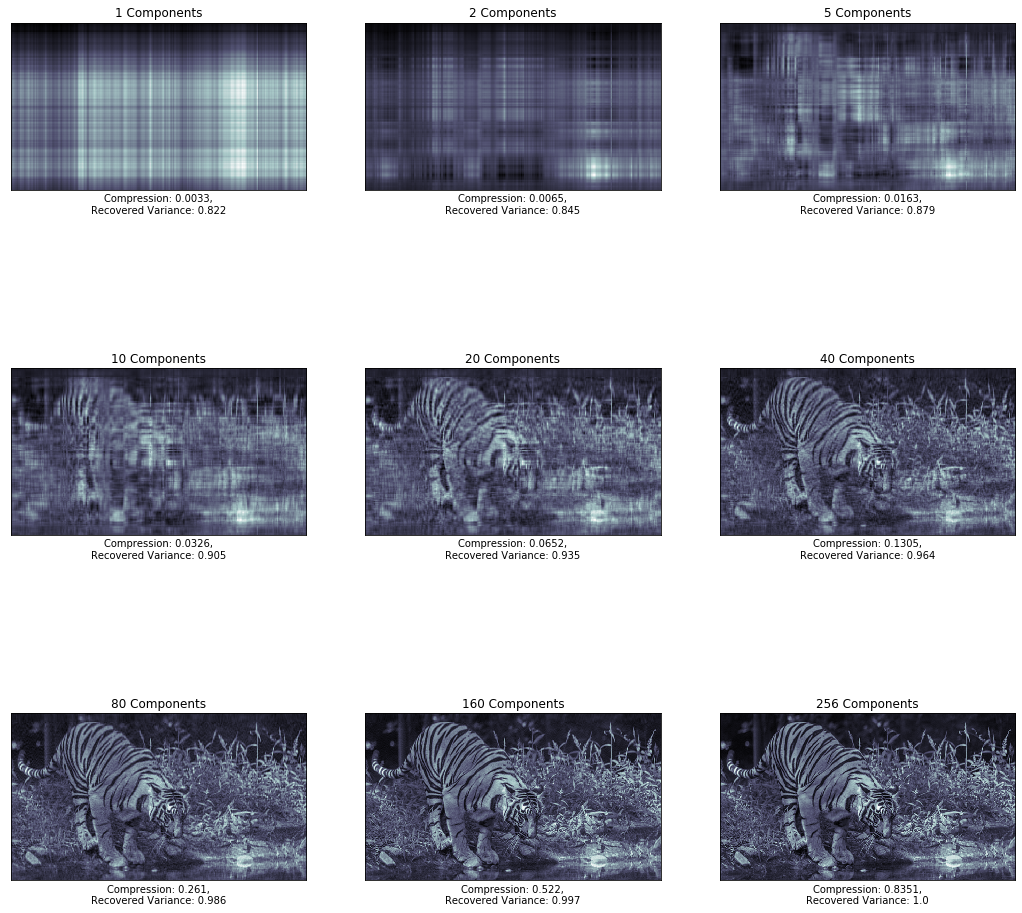

In [4]:
# HELPER CELL, DO NOT MODIFY
from imgcompression import ImgCompression

imcompression = ImgCompression()
bw_image = rgb2gray(image)
U, S, V = imcompression.svd(bw_image)
component_num = [1,2,5,10,20,40,80,160,256]

fig = plt.figure(figsize=(18, 18))

# plot several images
i=0
for k in component_num:
    img_rebuild = imcompression.rebuild_svd(U, S, V, k)
    c = np.around(imcompression.compression_ratio(bw_image, k), 4)
    r = np.around(imcompression.recovered_variance_proportion(S, k), 3)
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(img_rebuild, cmap=plt.cm.bone)
    ax.set_title(f"{k} Components")
    ax.set_xlabel(f"Compression: {c},\nRecovered Variance: {r}")
    i = i+1

### 1.3 Color image [5 pts] <span style="color:green">**[W]**</span>
Use your implementation to generate a set of images compressed to different degrees. Include the images in your non-programming submission of the assignment.

<b>Note:</b> You might get warning "Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers)." This warning is acceptable since while rebuilding some of the pixels may go above 1.0. You should see similar image to original even with such clipping.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


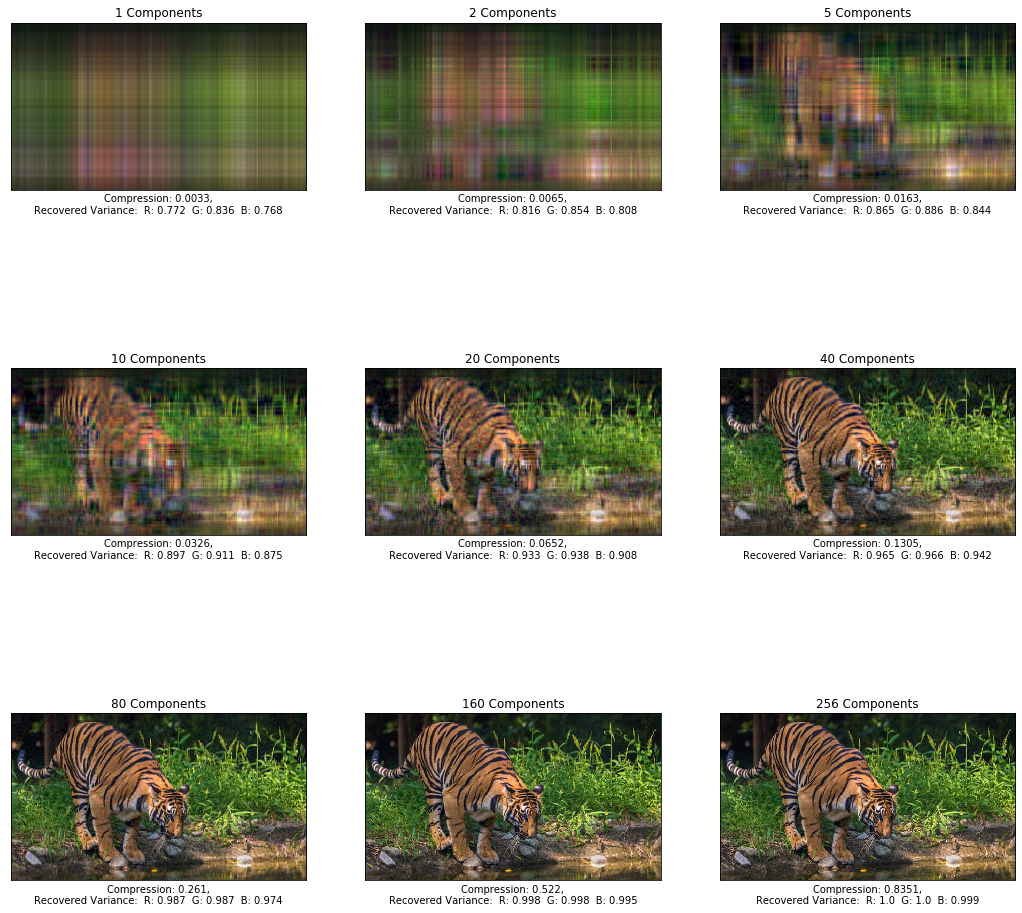

In [5]:
# HELPER CELL, DO NOT MODIFY
from imgcompression import ImgCompression

imcompression = ImgCompression()
U, S, V = imcompression.svd(image)

# component_num = [1,2,5,10,20,40,80,160,256]
component_num = [1,2,5,10,20,40,80,160,256]

fig = plt.figure(figsize=(18, 18))

# plot several images
i=0
for k in component_num:
    img_rebuild = imcompression.rebuild_svd(U, S, V, k)
    c = np.around(imcompression.compression_ratio(image, k), 4)
    r = np.around(imcompression.recovered_variance_proportion(S, k), 3)
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(img_rebuild)
    ax.set_title(f"{k} Components")
    ax.set_xlabel(f"Compression: {np.around(c,4)},\nRecovered Variance:  R: {r[0]}  G: {r[1]}  B: {r[2]}")
    i = i+1

## 2 Understanding PCA [15 pts] <span style="color:blue">**[P]**</span> | <span style="color:green">**[W]**</span>

### 2.1 Implementation [10 pts] <span style="color:blue">**[P]**</span>

[Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) (PCA) is another dimensionality reduction technique that reduces dimensions by eliminating small variance eigenvalues and their vectors. With PCA, we center the data first by subtracting the mean. Each singular value tells us how much of the variance of a matrix (e.g. image) is captured in each component. In this problem, we will investigate how PCA can be used to improve features for regression and classification tasks and how the data itself affects the behavior of PCA.  

Implement PCA in the <strong>pca.py</strong> file. 

Assume a dataset is composed of N datapoints, each of which has D features with D < N. The dimension of our data would be D. It is possible, however, that many of these dimensions contain redundant information. Each feature explains part of the variance in our dataset. Some features may explain more variance than others. 

#### In the <strong>pca.py</strong> file, complete the PCA class by completing functions fit, transform and transform_rv.

### 2.2 Visualize [5 pts] <span style="color:green">**[W]**</span>

PCA is used to transform multivariate data tables into smaller sets so as to observe the hidden trends and variations in the data. It can also be used as a feature extractor for images. Here you will visualize two datasets using PCA, first a breast cancer dataset and then a dataset of masked and unmasked images. 

The masked and unmasked dataset is made up of grayscale images of human faces facing forward. Half of these images are faces that are completely unmasked, and the remaining images show half of the face covered with an artificially generated face mask. The images have been reduced to a very small size and reshaped into a feature vector of pixels. 

Use the above implementation of PCA and reduce the datasets such that they contain only two features. Replicate the 2-D scatter plots shown below of the data points using these features. Make sure to differentiate the data points according to their true labels using color. The datasets have already been loaded for you.

In the <strong>pca.py</strong> file, implement the <strong>visualize</strong> function. 

(569, 2)
*In this plot, the 0 points are malignant and the 1 points are benign.


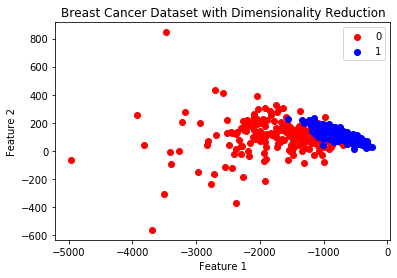

In [156]:
# HELPER CELL, DO NOT MODIFY
# Use PCA for visualization of breast cancer data
from pca import PCA
bc_data = load_breast_cancer(return_X_y=True)

X = bc_data[0]
y = bc_data[1]

plt.title('Breast Cancer Dataset with Dimensionality Reduction')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
PCA().visualize(X,y)
print('*In this plot, the 0 points are malignant and the 1 points are benign.')


(300, 2)
*In this plot, the 0 points are unmasked images and the 1 points are masked images.


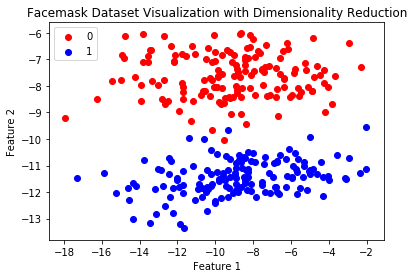

In [158]:
# HELPER CELL, DO NOT MODIFY
# Use PCA for visualization of masked and unmasked images

X = np.load('/Users/maggiebrown/ML_Spring2021/Assignments/HW3/data/smallflat.npy')
y = np.load('/Users/maggiebrown/ML_Spring2021/Assignments/HW3/data/masked_labels.npy')

plt.title('Facemask Dataset Visualization with Dimensionality Reduction')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
PCA().visualize(X,y)
print('*In this plot, the 0 points are unmasked images and the 1 points are masked images.')


Notice the distinct separation between the data points with different labels in both plots above.

Now you will use PCA on an actual real-world dataset. We will use your implementation of PCA function to reduce the dataset with 99% retained variance and use it to obtain the reduced features. On the reduced dataset, we will use logistic and linear regression to compare results between PCA and non-PCA datasets. Run the following cells to see how PCA works on regression and classification tasks.

In [161]:
# HELPER CELL, DO NOT MODIFY
#load the dataset 
iris = load_iris()

X = iris.data
y = iris.target

print("data shape before PCA ",X.shape)

pca = PCA()
pca.fit(X)

X_pca = pca.transform_rv(X)

print("data shape with PCA ",X_pca.shape)

data shape before PCA  (150, 4)
data shape with PCA  (150, 3)


In [162]:
# HELPER CELL, DO NOT MODIFY
# Train, test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

# Use logistic regression to predict classes for test set
clf = LogisticRegression()
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy Using Logistic Regression before PCA: {:.5f}'.format(accuracy_score(y_test, 
                                                preds.argmax(axis=1))))

Accuracy Using Logistic Regression before PCA: 0.93333


In [163]:
# HELPER CELL, DO NOT MODIFY
# Train, test splits
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

# Use logistic regression to predict classes for test set
clf = LogisticRegression()
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy using Logistic Regression after PCA: {:.5f}'.format(accuracy_score(y_test, 
                                                preds.argmax(axis=1))))

Accuracy using Logistic Regression after PCA: 0.95556


In [164]:
# HELPER CELL, DO NOT MODIFY
def apply_regression(X_train, y_train, X_test):
    ridge = Ridge()
    weight = ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    
    return y_pred

In [165]:
# HELPER CELL, DO NOT MODIFY
#load the dataset 
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

print(X.shape, y.shape)

pca = PCA()
pca.fit(X)

X_pca = pca.transform_rv(X, retained_variance = 0.9)
print("data shape with PCA ",X_pca.shape)

(442, 10) (442,)
data shape with PCA  (442, 9)


In [166]:
# HELPER CELL, DO NOT MODIFY
# Train, test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

#Ridge regression without PCA
y_pred = apply_regression(X_train, y_train, X_test)

# calculate RMSE 
rmse_score = np.sqrt(mean_squared_error(y_pred, y_test))
print('RMSE score using Ridge Regression before PCA: {:.5}'.format(rmse_score))

RMSE score using Ridge Regression before PCA: 55.794


In [167]:
# HELPER CELL, DO NOT MODIFY
#Ridge regression with PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.3, random_state=42)

#use Ridge Regression for getting predicted labels
y_pred = apply_regression(X_train,y_train,X_test)

#calculate RMSE 
rmse_score = np.sqrt(mean_squared_error(y_pred, y_test))
print('RMSE score using Ridge Regression after PCA: {:.5}'.format(rmse_score))

RMSE score using Ridge Regression after PCA: 55.797


For both the tasks above we see an improvement in performance by reducing our dataset with PCA.

Feel free to add other datasets in cell below and play around with what kind of improvement you get with using PCA. There are no points for playing around with other datasets. 

In [ ]:
######## YOUR CODE BELOW ########

#################################

## 3 Polynomial regression and regularization [60 pts + 20 pts bonus for CS 4641] <span style="color:blue">**[P]**</span> | <span style="color:green">**[W]**</span>

### 3.1 Regression and regularization implementations [30 pts + 20 pts bonus for CS 4641] <span style="color:blue">**[P]**</span>
We have three methods to fit linear and ridge regression models: 1) close form; 2) gradient descent (GD); 3) Stochastic gradient descent (SGD). For undergraduate students, you are required to implement the closed form for linear regression and for ridge regression, the others 4 methods are bonus parts. For graduate students, you are required to implement all of them. We use the term weight in the following code. Weights and parameters ($\theta$) have the same meaning here. We used parameters ($\theta$) in the lecture slides.

In the <strong>regression.py</strong> file, complete the Regression class by completing functions rmse, construct_polynomial_feates, predict first. Then, construct linear_fit_closed, linear_fit_GD, linear_fit_SGD for linear regression and ridge_fit_closed, ridge_fit_GD, and ridge_fit_SGD for ridge regression.  For undergraduate students, you are required to implement the closed form for linear regression and for ridge regression, the other 4 methods are bonus questions. <strong>For graduate students, you are required to implement all of them.</strong> The points for each function is in regression.py


In [12]:
from regression import Regression

### 3.2 About RMSE [3 pts] <span style="color:green">**[W]**</span>
What is a good RMSE value? If we normalize our labels between 0 and 1, what does it mean when normalized RMSE = 1? Please provide an example with your explanation.

**Hint**: Think of the way that you can enforce your RMSE = 1. Note that you can not change the actual labels to make RMSE = 1.

ANSWER:

The smaller the RMSE value, the better. However, a "good" RMSE value depends on the values of the dataset. Normalizing RMSE = 1 in a case where labels are between 0 and 1 means that majority of those values are labeled incorrectly. If a dataset skews towards one end of this range and they happen to be labeled incorrectly - having one incorrect label around many similar points will lead to those points also being labeled incrrectly, thus haviing a high error.

### 3.3 Testing: general functions and linear regression [5 pts] <span style="color:green">**[W]**</span>
In this section. we will test the performance of the linear regression. As long as your test rmse score is close to the TA's answer (TA's answer $\pm 0.5$), you can get full points.
Let's first construct a dataset for polynomial regression.

In this case, we construct the polynomial features up to degree 5.
Each data sample consists of two features $[a,b]$. We compute the polynomial features of both a and b in order to yield the vectors $[1,a,a^2,a^3, ... a^{degree}]$ and $[1,b,b^2,b^3, ... , b^{degree}]$. We train our model with the cartesian product of these polynomial features. The cartesian product generates a new feature vector consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.

For example, for degree = 2, we will have the polynomial features $[1,a,a^2]$ and $[1,b,b^2]$ for the datapoint $[a,b]$. The cartesian product of these two vectors will be $[1,a,b,ab,a^2,b^2]$. We do not generate $a^3$ and $b^3$ since their degree is greater than 2 (specified degree).



In [13]:
# HELPER CELL, DO NOT MODIFY
POLY_DEGREE = 5
NUM_OBS = 1500

rng = np.random.RandomState(seed=5)

true_weight = -rng.rand((POLY_DEGREE)**2+2, 1)
true_weight[2:, :] = 0
x_all1 = np.linspace(-5, 5, NUM_OBS)
x_all2 = np.linspace(-3, 3, NUM_OBS)
x_all = np.stack((x_all1,x_all2), axis=1)

reg = Regression()
x_all_feat = reg.construct_polynomial_feats(x_all, POLY_DEGREE)
x_cart_flat = []
for i in range(x_all_feat.shape[0]):
    point = x_all_feat[i]
    x1 = point[:,0]
    x2 = point[:,1]
    x1_end = x1[-1]
    x2_end = x2[-1]
    x1 = x1[:-1]
    x2 = x2[:-1]
    x3 = np.asarray([[m*n for m in x1] for n in x2])

    x3_flat = np.reshape(x3, (x3.shape[0]**2))
    x3_flat = list(x3_flat)
    x3_flat.append(x1_end)
    x3_flat.append(x2_end)
    x3_flat = np.asarray(x3_flat)
    x_cart_flat.append(x3_flat)
    
x_cart_flat = np.asarray(x_cart_flat)
x_all_feat = np.copy(x_cart_flat)

y_all = np.dot(x_cart_flat, true_weight) + rng.randn(x_all_feat.shape[0], 1) # in the second term, we add noise to data
print(x_all.shape, y_all.shape)

# Note that here we try to produce y_all as our training data
#plot_curve(x_all, y_all) # Data with noise that we are going to predict
#plot_curve(x_all, np.dot(x_cart_flat, true_weight), curve_type='-', color='r', lw=4) # the groundtruth information

indices = rng.permutation(NUM_OBS)

(1500, 2) (1500, 1)


(1500,) (1500,) (1500,)


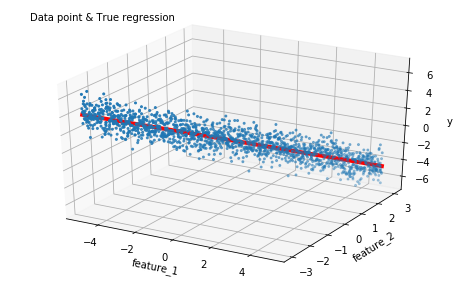

In [14]:
# HELPER CELL, DO NOT MODIFY
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')

p = np.reshape(np.dot(x_cart_flat, true_weight), (1500,))
print(x_all[:,0].shape, x_all[:,1].shape,p.shape)
ax.plot(x_all[:,0], x_all[:,1], p, c="red",linewidth=4)
ax.scatter(x_all[:,0], x_all[:,1], y_all,s=4)
ax.set_xlabel("feature_1")
ax.set_ylabel("feature_2")
ax.set_zlabel("y")
ax.text2D(0.05, 0.95, "Data point & True regression", transform=ax.transAxes)
plt.show()

In the figure above, the red curve is the true fuction we want to learn, while the blue dots are the noisy data points. The data points are generated by  $Y=X\theta+σ$ , where  σ∼N(0,1)  are i.i.d. generated noise.

Now let's split the data into two parts, namely the training set and test set. The red dots are for training, while the blue dots are for testing.

(750, 2) (750, 2) (1500, 1)


Text(0.05, 0.95, 'Test set & Training set')

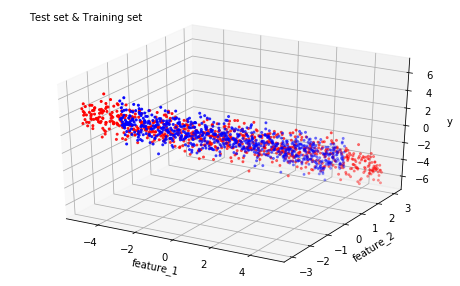

In [15]:
# HELPER CELL, DO NOT MODIFY
train_indices = indices[:NUM_OBS//2]
test_indices = indices[NUM_OBS//2:]

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')

xtrain = x_all[train_indices]
ytrain = y_all[train_indices]
xtest = x_all[test_indices]
ytest = y_all[test_indices]

print(xtrain.shape, xtest.shape, y_all.shape)
ax.scatter(xtrain[:,0], xtrain[:,1], ytrain, c='r',s=4)
ax.scatter(xtest[:,1], xtest[:,1], ytest, c='b',s=4)
ax.set_xlabel("feature_1")
ax.set_ylabel("feature_2")
ax.set_zlabel("y")
ax.text2D(0.05, 0.95, "Test set & Training set", transform=ax.transAxes)

Now let's first train using the entire training set, and see how we perform on the test set and how the learned function look like. (No need to answer following questions. Just run the helper cells.)

In [16]:
# HELPER CELL, DO NOT MODIFY
weight = reg.linear_fit_closed(x_all_feat[train_indices], y_all[train_indices])
y_test_pred = reg.predict(x_all_feat[test_indices], weight)
test_rmse = reg.rmse(y_test_pred, y_all[test_indices])
print('test rmse: %.4f' % test_rmse)

test rmse: 4.5593


In [18]:
# HELPER CELL, DO NOT MODIFY
#This cell may take more than 1 minute
weight = reg.linear_fit_GD(x_all_feat[train_indices], y_all[train_indices], epochs=50000, learning_rate=1e-9)
y_test_pred = reg.predict(x_all_feat[test_indices], weight)
test_rmse = reg.rmse(y_test_pred, y_all[test_indices])
print('test rmse: %.4f' % test_rmse)

750 27


NotImplementedError: 

And what if we just use the first 10 data points to train?

In [ ]:
# HELPER CELL, DO NOT MODIFY
sub_train = train_indices[:10]
weight = reg.linear_fit_closed(x_all_feat[sub_train], y_all[sub_train])
y_test_pred = reg.predict(x_all_feat[test_indices], weight)
test_rmse = reg.rmse(y_test_pred, y_all[test_indices])
print('test rmse: %.4f' % test_rmse)

test rmse: 8.7198


Did you see a worse performance? Let's take a closer look at what we have learned.

Text(0.05, 0.95, 'Linear Regression Result')

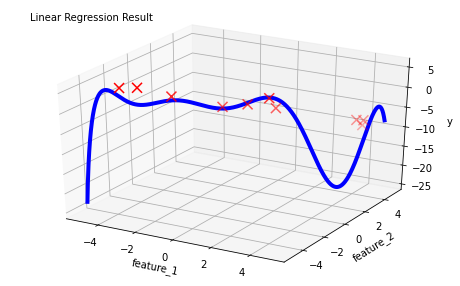

In [ ]:
# HELPER CELL, DO NOT MODIFY
y_pred = reg.predict(x_all_feat, weight)

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')

x1 = x_all[:,0]
x2 = x_all[:,0]
y_pred = np.reshape(y_pred, (1500,))
ax.plot(x1, x2, y_pred, color='b', lw=4)

x3 = x_all[sub_train,0]
x4 = x_all[sub_train,1]
ax.scatter(x3, x4, y_all[sub_train], s=100, c='r', marker='x')

y_test_pred = reg.predict(x_all_feat[test_indices], weight)
ax.set_xlabel("feature_1")
ax.set_ylabel("feature_2")
ax.set_zlabel("y")
ax.text2D(0.05, 0.95, "Linear Regression Result", transform=ax.transAxes)

### 3.4 Testing: Testing ridge regression [5 pts] <span style="color:green">**[W]**</span>



Now let's try ridge regression. Similarly, undergraduate students need to implement the closed form, and graduate students need to implement all the three methods. We will call the prediction function from linear regression part. As long as your test rmse score is close to the TA's answer (TA's answer $\pm 0.5$), you can get full points.


Again, let's see what we have learned. You only need to run the cell corresponding to your specific implementation.

(10, 27)
(10, 1)
test rmse: 1.6440


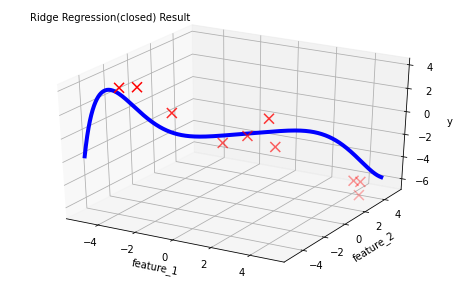

In [ ]:
# HELPER CELL, DO NOT MODIFY
sub_train = train_indices[:10]
print(x_all_feat[sub_train].shape)
print(y_all[sub_train].shape)
weight = reg.ridge_fit_closed(x_all_feat[sub_train], y_all[sub_train], c_lambda=1000)

y_pred = reg.predict(x_all_feat, weight)

y_test_pred = reg.predict(x_all_feat[test_indices], weight)
test_rmse = reg.rmse(y_test_pred, y_all[test_indices])
print('test rmse: %.4f' % test_rmse)

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')

x1 = x_all[:,0]
x2 = x_all[:,0]
y_pred = np.reshape(y_pred, (1500,))
ax.plot(x1, x2, y_pred, color='b', lw=4)

x3 = x_all[sub_train,0]
x4 = x_all[sub_train,1]
ax.scatter(x3, x4, y_all[sub_train], s=100, c='r', marker='x')
ax.set_xlabel("feature_1")
ax.set_ylabel("feature_2")
ax.set_zlabel("y")
ax.text2D(0.05, 0.95, "Ridge Regression(closed) Result", transform=ax.transAxes)

y_test_pred = reg.predict(x_all_feat[test_indices], weight)

test rmse: 1.9828


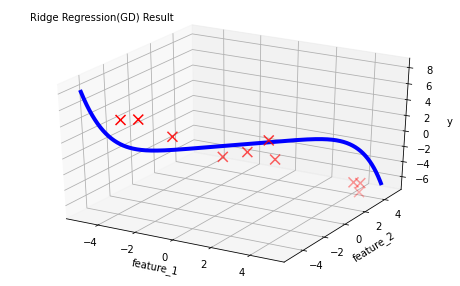

In [ ]:
# HELPER CELL, DO NOT MODIFY
sub_train = train_indices[:10]
weight = reg.ridge_fit_GD(x_all_feat[sub_train], y_all[sub_train], c_lambda=1000, learning_rate=1e-9)

y_pred = reg.predict(x_all_feat, weight)

y_test_pred = reg.predict(x_all_feat[test_indices], weight)
test_rmse = reg.rmse(y_test_pred, y_all[test_indices])
print('test rmse: %.4f' % test_rmse)

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')

x1 = x_all[:,0]
x2 = x_all[:,0]
y_pred = np.reshape(y_pred, (1500,))
ax.plot(x1, x2, y_pred, color='b', lw=4)

x3 = x_all[sub_train,0]
x4 = x_all[sub_train,1]
ax.scatter(x3, x4, y_all[sub_train], s=100, c='r', marker='x')
ax.set_xlabel("feature_1")
ax.set_ylabel("feature_2")
ax.set_zlabel("y")
ax.text2D(0.05, 0.95, "Ridge Regression(GD) Result", transform=ax.transAxes)

y_test_pred = reg.predict(x_all_feat[test_indices], weight)

test rmse: 2.0857


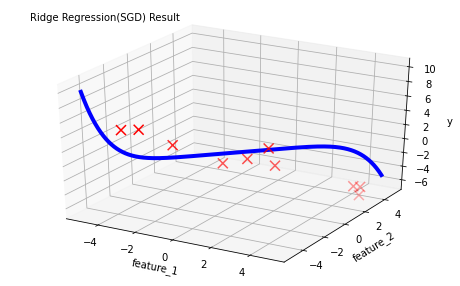

In [ ]:
# HELPER CELL, DO NOT MODIFY
sub_train = train_indices[:10]
weight = reg.ridge_fit_SGD(x_all_feat[sub_train], y_all[sub_train], c_lambda=1000, learning_rate=1e-9)

y_pred = reg.predict(x_all_feat, weight)

y_test_pred = reg.predict(x_all_feat[test_indices], weight)
test_rmse = reg.rmse(y_test_pred, y_all[test_indices])
print('test rmse: %.4f' % test_rmse)

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')

x1 = x_all[:,0]
x2 = x_all[:,0]
y_pred = np.reshape(y_pred, (1500,))
ax.plot(x1, x2, y_pred, color='b', lw=4)

x3 = x_all[sub_train,0]
x4 = x_all[sub_train,1]
ax.scatter(x3, x4, y_all[sub_train], s=100, c='r', marker='x')
ax.set_xlabel("feature_1")
ax.set_ylabel("feature_2")
ax.set_zlabel("y")
ax.text2D(0.05, 0.95, "Ridge Regression(SGD) Result", transform=ax.transAxes)

y_test_pred = reg.predict(x_all_feat[test_indices], weight)

### 3.5 Cross validation [7 pts] <span style="color:green">**[W]**</span>
Let's use Cross Validation to find the best value for c_lambda in ridge regression.

In [ ]:
# HELPER CELL, DO NOT MODIFY
# We provided 6 possible values for lambda, and you will use them in cross validation.
# For cross validation, use 10-fold method and only use it for your training data (you already have the train_indices to get training data).
# For the training data, split them in 10 folds which means that use 10 percent of training data for test and 90 percent for training.
# At the end for each lambda, you have caluclated 10 rmse and get the mean value of that.
# That's it. Pick up the lambda with the lowest mean value of rmse. 
# Hint: np.concatenate is your friend.
best_lambda = None
best_error = None
kfold = 10
lambda_list = [0.1, 1, 5, 10, 100, 1000]

for lm in lambda_list:
    err = reg.ridge_cross_validation(x_all_feat[train_indices], y_all[train_indices], kfold, lm)
    print('lambda: %.2f' % lm, 'error: %.6f'% err)
    if best_error is None or err < best_error:
        best_error = err
        best_lambda = lm

print('best_lambda: %.2f' % best_lambda)
weight = reg.ridge_fit_closed(x_all_feat[train_indices], y_all[train_indices], c_lambda=10)
y_test_pred = reg.predict(x_all_feat[test_indices], weight)
test_rmse = reg.rmse(y_test_pred, y_all[test_indices])
print('test rmse: %.4f' % test_rmse)  

lambda: 0.10 error: 1.002529
lambda: 1.00 error: 1.002517
lambda: 5.00 error: 1.002496
lambda: 10.00 error: 1.002541
lambda: 100.00 error: 1.008625
lambda: 1000.00 error: 1.038424
best_lambda: 5.00
test rmse: 1.0034


### 3.6 Noisy Input Samples in Linear Regression [10 pts] <span style="color:green">**[W]**</span>



Consider a linear model of the form:
$$
y(x_n,\theta) = \theta_0 + \sum_{d=1}^D\theta_dx_{nd}
$$
where $x_n = (x_{n1},...,x_{nD})$ and weights $\theta = (\theta_0,...,\theta_D)$. Given the the D-dimension input sample set $x = \{ x_1,...,x_n\}$ with corresponding target value $y = \{y_1,...,y_n\}$, the sum-of-squares error function is:
$$
E_D(\theta) = \frac{1}{2}\sum_{n=1}^N\left\{y(x_n,\theta)-y_n\right\}^2
$$

Now, suppose that Gaussian noise $\epsilon_n$ with zero mean and variance $\sigma^2$ is added independently to each of the input sample $x_n$ to generate a new sample set $x'= \{x_1+\epsilon_1,...,x_n+\epsilon_n\}$. For each sample $x_n$, $x_n' = (x_{n1} + \epsilon_{n1},...,x_{nD} + \epsilon_{nd})$, where $n$ and $d$ is independent across both $n$ and $d$ indices. 

1. (3pts) Show that $y(x_n',\theta) = y(x_n, \theta) + \sum^D_{d=1}\theta_d\epsilon_{nd}$ 

2. (7pts) Assume the sum-of-squares error function of the noise sample set $x'= \{x_1+\epsilon_1,...,x_n+\epsilon_n\}$ is $E_D(\theta)'$. Prove the expectation of $E_D(\theta)'$ is equivalent to the sum-of-squares error $E_D(\theta)$ for noise-free input samples with the addition of a weight-decay regularization term  (e.g. $L_2$ norm) , in which the bias parameter $\theta_0$ is omitted from the regularizer. In other words, show that
$$
E[E_D(\theta)'] = E_D(\theta) + regularizer
$$



**Hint:** 


*   During the class, we have discussed how to solve for the weight $\theta$ for ridge regression, the function looks like this: 
$$
E(\theta)=\frac{1}{N}\sum_{i=1}^N\left\{ y(x_i,\theta)-y_i \right\}^2+\frac{\lambda}{N}\sum_{i=1}^d ||\theta_i||^2\
$$
where the first term is the sum-of-squares error and the second term is the regularization term. N is the number of samples. In this question, we use another form of the ridge regression, which is:
$$
E(\theta)=\frac{1}{2}\sum_{i=1}^N\left\{ y(x_i,\theta)-y_i \right\}^2+\frac{\lambda}{2}\sum_{i=1}^d ||\theta_i||^2\
$$
* For the Gaussian noise $\epsilon_n$, we have $E[\epsilon_n]=0$

*  Assume the noise $\epsilon = (\epsilon_1,..., \epsilon_n)$ are **independent** to each other, we have
$$ 
E[\epsilon_n\epsilon_m]=\left\{
\begin{array}{rcl}
\sigma^2       &      & m = n\\
0     &      & m \neq n\\
\end{array} \right. 
$$ 


## 4. Naive Bayes Classification [25pts]<span style="color:blue">**[P]**</span> | <span style="color:green">**[W]**</span>

### 4.1 Bayes in Advertisements [5pts] <span style="color:green">**[W]**</span>

A doctor wants to evaluate her patients' health conditions and their relations to lifestyle. She sampled 12 patients randomly and conducted a survey to learn about their lifestyles. The table below shows the current health risk a patient is at and his/her lifestyle. 

| Health Risk  | Smoker? | Exercise Frequency (days/wk) | Average Sleeping hours per day |
|--------------|---------|------------------------------|--------------------------------|
| High         | Yes     | 0-3                          | <6                             |
| Medium       | Yes     | 0-3                          | 6-9                            |
| Low          | Yes     | >3                           | 6-9                            |
| Medium       | No      | >3                           | 6-9                            |
| Low          | No      | 0-3                          | 6-9                            |
| Low          | No      | >3                           | <6                             |
| High         | Yes     | >3                           | <6                             |
| Medium       | No      | >3                           | <6                             |
| High         | No      | 0-3                          | 6-9                            |
| Low          | No      | 0-3                          | 6-9                            |
| Medium       | Yes     | 0-3                          | 6-9                            |
| Low          | Yes     | >3                           | 6-9                            |

Given that a smoker who exercises >3 days/wk and sleeps 6-9 hours on a daily average, assess the health condition this person is most likely to be in using Naive Bayes.

Note: You can assume that each habit of a person is independent from other habits i.e. A person who exercises regularly does not tell any information about his sleeping pattern or whether he is a smoker.

ANSWER:

This person is likely at Low Risk:

High Risk: (3/12)(2/3)(1/3)(1/3) = 0.0185

Medium Risk: (4/12)(2/4)(2/4)(3/4) = 0.0625

Low Risk: (5/12)(2/5)(3/5)(4/5) = 0.0800

0.0800 > 0.0185 and 0.0800 > 0.0625


### 4.2 Sentiment Analysis for News [15pts] <span style="color:blue">**[P]**</span>

This dataset contains the sentiments for financial news headlines from the perspective of a retail investor. The sentiment of news has 3 classes, negative(class label = 0), neutral(class label = 1) and positive(class label = 2). There are 4846 news in total with 9 duplicates. We remove those duplicates to achieve 4837 unique news values and then randomly split the 4837 news into training set and evaluation set with 8:2 ratio. We use the training set to fit the Naive Bayes model and use the evaluation set to evaluate the accuracy of our model.

The code which is provided loads the documents and builds a [“bag of words” representation](https://en.wikipedia.org/wiki/Bag-of-words_model)  of each document. Your task is to complete the missing portions of the code and to determine whether a news is negative, neutral or positive.
(Hint: Label 0 denotes the news is negative, label 1 denotes the news is neutral and 2 means the news is positive. Our job here is to determine whether a news is negative, neutral or positive using Naive Bayes).

**priors_prob** function calculates the ratio of class probabilities of negative, neutral or positive. We do this based on word counts rather than document counts.

**likelihood_ratio** function calculates the ratio of word probablities given the label of whether the news is negative, neutral or positive.

**analyze_sentiment** function takes in the likelihood ratio, priors probabilities for each class and a number of test news represented in Bag-of-Words representation, and analyzes the sentiment for each news.

For example, if we have a matrix like: (the first cloumn denotes the class label, the entries in the remaining columns denote the number of occurrances for each word)
$$\begin{bmatrix} 
    label & happy & useless \\ 
    0(negative) & 1 & 4 \\ 
    0 & 0 & 6 \\ 
    1(neutral) & 3 & 2 \\
    2(positive) & 3 & 1 \\
    2 & 4 & 0
  \end{bmatrix}
$$
Then we have 
$$prior(negative) = \frac{1+4+0+6}{1+4+0+6+3+2+3+1+4+0} = \frac{11}{24}$$
$$prior(neutral) = \frac{3+2}{1+4+0+6+3+2+3+1+4+0} = \frac{5}{24}$$
$$prior(positive) = \frac{3+1+4+0}{1+4+0+6+3+2+3+1+4+0} = \frac{8}{24}$$

**Note 1:** In likelihood_ratio() add one to each word count so as to avoid issues with zero word count. This is known as Add-1 smoothing. It is a type of additive smoothing. 

$$likelihood(negative) = [\frac{1+0+1}{1+0+1+4+6+1}\ \frac{4+6+1}{1+0+1+4+6+1}] = [\frac{2}{13}\ \frac{11}{13}]$$
$$likelihood(neutral) = [\frac{3+1}{3+2+1}\ \frac{2+1}{3+1+2+1}] = [\frac{4}{7}\ \frac{3}{7}]$$
$$likelihood(positive) = [\frac{3+4+1}{3+4+1+1+0+1}\ \frac{1+0+1}{3+4+1+1+0+1}] = [\frac{8}{10}\ \frac{2}{10}]$$


In [185]:
from nb import NaiveBayes
import pandas as pd

In [196]:
# HELPER CELL, DO NOT MODIFY
'''
Read data and convert to BOW matrix
DO NOT modify this function
'''
train = pd.read_csv("/Users/maggiebrown/ML_Spring2021/Assignments/HW3/data/news-data.csv",
                    encoding='cp437', header=None)

class_to_label_mappings = {
    "negative": 0,
    "neutral": 1,
    "positive": 2
}

train.columns = ["Sentiment", "News"]
train.drop_duplicates(inplace=True)

train["Sentiment"] = train["Sentiment"].map(
    class_to_label_mappings)

stop_words = text.ENGLISH_STOP_WORDS
vectorizer = text.CountVectorizer(stop_words=stop_words)

X = train['News'].values
y = train['Sentiment'].values

RANDOM_SEED = 5
BOW = vectorizer.fit_transform(X).toarray()
X_train, X_test, y_train, y_test = train_test_split(
    BOW, y, test_size=0.2, random_state=RANDOM_SEED)

X_negative = X_train[y_train == 0]
X_neutral = X_train[y_train == 1]
X_positive = X_train[y_train == 2]

In [296]:
# HELPER CELL, DO NOT MODIFY
NB = NaiveBayes()
likelihood_ratio = NB.likelihood_ratio(X_negative, X_neutral, X_positive)
priors_prob = NB.priors_prob(X_negative, X_neutral, X_positive)
resolved = NB.analyze_sentiment(likelihood_ratio, priors_prob, X_test)

# You should be getting around 70% of accuracy
print("test accuracy: ", np.sum(resolved == y_test) / len(resolved) * 1.)

test accuracy:  0.7045454545454546


### 4.3 Accuracy result analysis [5pts] <span style="color:green">**[W]**</span>

Do you think this is a good accuracy? What assumptions can you make that limit the accuracy? (This is an open question, any reasonable assumptions will be acceptable).

ANSWER:
This accuracy seems reasonable, but not great. It's possible that not all of the words present should be treated as independent features, as there are many words that are often times used together in a given context. This kind of classification might benefit from weighting specific words for classification, for instance maybe less common words that are context specific could be given higher weights than more common words.

## 5 Noise in PCA and Linear Regression (15 Pts) <span style="color:blue">**[P]**</span><span style="color:green">**[W]**</span>

Both PCA and least squares regression can be viewed as algorithms for inferring (linear) relationships
among data variables. In this part of the assignment, you will develop some intuition for the differences
between these two approaches, and an understanding of the settings that are better suited to using PCA or
better suited to using the least squares fit.

The high level bit is that PCA is useful when there is a set of latent (hidden/underlying)
variables, and all the coordinates of your data are linear combinations (plus noise) of those variables. The
least squares fit is useful when you have direct access to the independent variables, so any noisy coordinates
are linear combinations (plus noise) of known variables.

### 5.1 Slope Functions (5 Pts) <span style="color:blue">**[P]**</span>

In <strong>slope.py</strong> complete the following:
1. For this function, assume that X is the first feature and Y is the second feature for the data. Write a function, <strong>pca_slope</strong>, that takes in the first feature vector X and the second feature vector Y. Concatenate these two feature vectors into a single Nx2 matrix and use this to determine the first principal component vector of this dataset. Finally, return the slope of this first component. You should use the PCA implementation from Q2. <br /><br />

2. Write a function <strong>lr_slope</strong> that takes X and y and returns the slope of the least squares fit. You should use the Linear Regression implementation from Q3 but do not use any kind of regularization. Think about how weight could relate to slope. 

In later subparts, we consider the case where our data consists of noisy measurements of x and y. For each
part, we will evaluate the quality of the relationship recovered by PCA, and that recovered by standard least
squares regression.

As a reminder, least squares regression minimizes the squared error of the dependent variable from its
prediction. Namely, given $(x_i, y_i)$ pairs, least squares returns the line $l(x)$ that minimizes $\sum_i (y_i − l(x_i))^2$.

In [76]:
from slope import Slope

We will consider a simple example with two variables, x and y, where the true relationship between the
variables is y = 4x. Our goal is to recover this relationship—namely, recover the coefficient “4”. We set X = [0, .02, .04, .06, . . . , 1] and y = 4x. Make sure both functions return 4.

Slope of first principal component 4.0
Slope of best linear fit 4.0


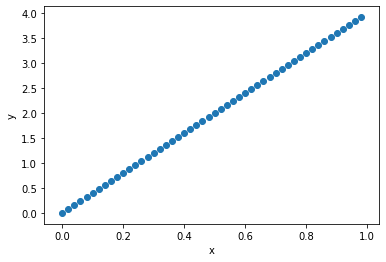

In [77]:
# HELPER CELL, DO NOT MODIFY
x = np.arange(0, 1, 0.02)
y = 4 * np.arange(0, 1, 0.02)

print("Slope of first principal component", Slope().pca_slope(x, y))

print("Slope of best linear fit", Slope().lr_slope(x[:, None], y))

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### 5.2 Analysis Setup (5 Pts) <span style="color:blue">**[P]**</span>

### Error in y

In this subpart, we consider the setting where our data consists of the actual values of $x$, and noisy estimates of $y$. Run the following cell to see how the data looks when there is error in $y$.

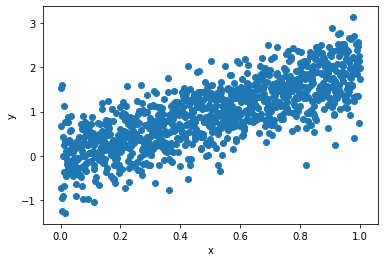

In [78]:
# HELPER CELL, DO NOT MODIFY
base = np.arange(0.001, 1, 0.001)
c = 0.5
X = base
y = 2 * base + np.random.normal(loc=[0], scale=c, size=base.shape)

plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In <strong>slope.py</strong>, you will implement the <strong>addNoise</strong> function:
1. Create a vector $X$ where $X = [x_1, x_2, . . . , x_{1000}] = [.001, .002, .003, . . . , 1]$.<br /><br />
2. For a given noise level $c$, set $ \hat{y}_i ∼ 2x_i + \mathcal{N}(0, c) = 2i/1000 + \mathcal{N}(0, c)$, and $\hat{Y} = [\hat{y}_1, \hat{y}_2, . . . , \hat{y}_{1000}]$. You can use the np.random.normal function, where scale is equal to noise level, to add noise to your points.<br /><br />
3. Return the <strong>pca_slope</strong> and <strong>lr_slope</strong> values of this $X$ and $\hat{Y}$ dataset you have created where only $\hat{Y}$ has noise.<br /><br />

A scatter plot with c on the horizontal axis, and the output of <strong>pca_slope</strong> and <strong>lr_slope</strong> on the vertical axis has already been implemented for you.

A sample $\hat{Y}$ has been taken for each $c$ in $[0, 0.05, 0.1, . . . , .95, 1.0]$. The output of <strong>pca_slope</strong> is plotted as a red dot, and the output of <strong>lr_slope</strong> as a blue dot. This has been repeated 30 times, you can see that we end up with a plot of 1260 dots, in 21 columns of 60, half red and half blue.

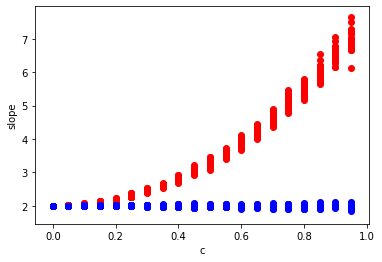

In [96]:
# HELPER CELL, DO NOT MODIFY
from slope import Slope
pca_slope_values = []
linreg_slope_values = []
c_values = []
s_idx = 0

for i in range(30):
    for c in np.arange(0, 1, 0.05):
        
        # Calculate pca_slope_value (psv) and lr_slope_value (lsv)
        psv, lsv = Slope().addNoise(c, seed = s_idx)
        
        # Append pca and lr slope values to list for plot function
        pca_slope_values.append(psv)
        linreg_slope_values.append(lsv)
        
        # Append c value to list for plot function
        c_values.append(c)
        
        # Increment random seed index
        s_idx += 1
        
plt.scatter(c_values, pca_slope_values, c='r')
plt.scatter(c_values, linreg_slope_values, c='b')
plt.xlabel("c")
plt.ylabel("slope")
plt.show()

### Error in x and y

We will now examine the case where our data consists of noisy estimates of <strong>both</strong> $x$ and $y$. Run the following cell to see how the data looks when there is error in both.

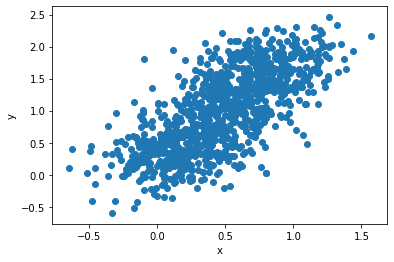

In [92]:
# HELPER CELL, DO NOT MODIFY
base = np.arange(0.001, 1, 0.001)
c = 0.5
X = base + np.random.normal(loc=[0], scale=c, size=base.shape) * 0.5
y = 2 * base + np.random.normal(loc=[0], scale=c, size=base.shape) * 0.5

plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In <strong>slope.py</strong> you will modify the <strong>addNoise</strong> function you created in the previous step:
1. Notice the parameter <strong>x_noise</strong> in the <strong>addNoise</strong> function. When this parameter is set to $True$, you will have to add noise to $X$. For a given noise level c, let $\hat{x}_i ∼ x_i + \mathcal{N}(0, c) = i/1000 + \mathcal{N}(0, c)$, and $\hat{X} = [\hat{x}_1, \hat{x}_2, . . . . \hat{x}_{1000}]$ <br /><br />
2. For the same noise level c, set $ \hat{y}_i ∼ 2x_i + \mathcal{N}(0, c) = 2i/1000 + \mathcal{N}(0, c)$, and $\hat{Y} = [\hat{y}_1, \hat{y}_2, . . . , \hat{y}_{1000}]$. Again, you can use *np.random.normal function, where scale is equal to noise level, to add noise to your points.<br /><br />
3. Return the <strong>pca_slope</strong> and <strong>lr_slope</strong> values of this $\hat{X}$ and $\hat{Y}$ dataset you have created where both $\hat{X}$ and $\hat{Y}$ have noise.<br /><br />

[<strong>*HINT:</strong> Make sure to apply np.random.normal for the $\hat{X}$ values first and then apply np.random.normal for the $\hat{Y}$ values second. This is so that the random seed values match in the autograder tests.]

A scatter plot with c on the horizontal axis, and the output of <strong>pca-slope</strong> and <strong>lr-slope</strong> on the vertical axis has already been implemented for you. A sample $\hat{X}$ and $\hat{Y}$ has been taken for each $c$ in $[0, 0.05, 0.1, . . . , .95, 1.0]$. The output of <strong>pca-slope</strong> is plotted as a red dot, and the output of <strong>lr-slope</strong> as a blue dot. This has been repeated 30 times, you can see that we end up with a plot of 1260 dots, in 21 columns of 60, half red and half blue.

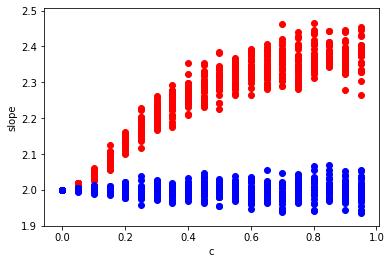

In [101]:
# HELPER CELL, DO NOT MODIFY
from slope import Slope
pca_slope_values = []
linreg_slope_values = []
c_values = []
s_idx = 0

for i in range(30):
    for c in np.arange(0, 1, 0.05):
        
        # Calculate pca_slope_value (psv) and lr_slope_value (lsv), notice x_noise = True
        psv, lsv = Slope().addNoise(c, x_noise = True, seed = s_idx)
        
        # Append pca and lr slope values to list for plot function
        pca_slope_values.append(psv)
        linreg_slope_values.append(lsv)
        
        # Append c value to list for plot function
        c_values.append(c)
        
        # Increment random seed index
        s_idx += 1

plt.scatter(c_values, pca_slope_values, c='r')
plt.scatter(c_values, linreg_slope_values, c='b')
plt.xlabel("c")
plt.ylabel("slope")
plt.show()

### 5.3. Analysis (5 Pts) <span style="color:green">**[W]**</span>
Based on your observations from previous subsections answer the following questions about the two cases (error in $X$ and error in both $X$ and $Y$) in 2-3 lines. 

Note: 
1. The closer the value of slope to actual slope ("2" here) the better the algorithm is performing.
2. You don't need to provide a mathematical proof for this question.

Questions:
1. Which case does PCA perform worse in? Why does PCA perform worse in this case? (2 Pts)
2. Why does PCA perform better in the other case? (1 Pt)
3. Which case does Linear Regression perform well? Why does Linear Regression perform well in this case? (2 Pts)

ANSWERS:

1. PCA seems to perform worse when noise is added to both X and Y. PCA performs worse here because the more noise you add, the more variance there is, and PCA tends to try and capture the maximum variance.

2. PCA performs better in the other case with less noise, in which the variance captured is the true variance of the dataset and not capturing noise.

3. Linear regression performs well with respect to PCA in both cases because instead of capturing variance to obtain a slope, the actual slope/weights are optimized which are independent of variance.

## 6 Feature Selection [Bonus for everyone] [25 Points] <span style="color:blue">**[P]**</span> | <span style="color:green">**[W]**</span>


### 6.1 Implementation [18 Points] <span style="color:blue">**[P]**</span>

Feature selection is an integral aspect of machine learning. It is the process of selecting a subset of relevant features that are to be used as the input for the machine learning task. Feature selection may lead to simpler models for easier interpretation, shorter training times, avoidance of the curse of dimensionality, and better generalization by reducing overfitting.

Implement a method to find the final list of significant features due to forward selection and backward elimination.

#### Forward Selection: 

In forward selection, we start with a null model, start fitting the model with one individual feature at a time, and select the feature with the minimum p-value. We continue to do this until we have a set of features where one feature's p-value is less than the confidence level. 

Steps to implement it:
- 1: Choose a significance level (given to you).
- 2: Fit all possible simple regression models by considering one feature at a time.
- 3: Select the feature with the lowest p-value.
- 4: Fit all possible models with one extra feature added to the previously selected feature(s).
- 5: Select the feature with the minimum p-value again. if p_value < significance, go to Step 4. Otherwise, terminate.

#### Backward Elimination: 

In backward elimination, we start with a full model, and then remove the insignificant feature with the highest p-value (that is greater than the significance level). We continue to do this until we have a final set of significant features. 

Steps to implement it:
- 1: Choose a significance level (given to you).
- 2: Fit a full model including all the features.
- 3: Select the feature with the highest p-value. If (p_value > significance level), go to Step 4, otherwise terminate.
- 4: Remove the feature under consideration.
- 5: Fit a model without this feature. Repeat entire process from Step 3 onwards.

*TIP 1: The p-value is known as the observed significance value for a test hypothesis. It tests all the assumptions about how the data was generated in the model, not just the target hypothesis it was supposed to test. Some more information about p-values can be found here: https://towardsdatascience.com/what-is-a-p-value-b9e6c207247f*

*TIP 2: For this function, you will have to install statsmodels if not installed already. Run 'pip install statsmodels' in command line/terminal. In the case that you are using an Anaconda environment, run 'conda install -c conda-forge statsmodels' in the command line/terminal. For more information about installation, refer to https://www.statsmodels.org/stable/install.html. The statsmodels library is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. You will have to use this library to choose a regression model to fit your data against. Some more information about this module can be found here: https://www.statsmodels.org/stable/index.html*

*TIP 3: For step 2 in each of the forward and backward selection functions, you can use the 'sm.OLS' function as your regression model. Also, do not forget to add a bias to your regression model. A function that may help you is the 'sm.add_constants' function.*

*TIP 4: You should be able to implement these function using only the libraries provided in the cell below.*

In [11]:
# HELPER CELL, DO NOT MODIFY

import pandas as pd
import statsmodels.api as sm

from feature_selection import FeatureSelection

boston = load_boston()
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['Price'] = boston.target
X = bos.drop("Price", 1)       # feature matrix 
y = bos['Price']               # target feature
featureselection = FeatureSelection()
#Run the functions to make sure two lists are generated, one for each method
print("Features selected by forward selection:", featureselection.forward_selection(X, y))
print("Features selected by backward elimination:", featureselection.backward_elimination(X, y)[0])

Features selected by forward selection: ['LSTAT', 'RM', 'PTRATIO', 'DIS', 'NOX', 'CHAS', 'B', 'ZN', 'CRIM', 'RAD', 'TAX']
Features selected by backward elimination: ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


### 6.2 Feature Selection - Discussion [7pts] <span style="color:green">**[W]**</span>

#### Question 6.2.1: 
We have seen two regression methods namely Lasso and Ridge regression earlier in this assignment. Another extremely important and common use-case of these methods is to perform feature selection. According to you, which of these two methods are more appropriate for feature selection? Why? **(3 pts)**

ANSWER:

Lasso regression particularly works well for feature selection due to its ability to shrink some coefficients to zero and ultimately remove features from the model. While Ridge regression is similar, it scales the coefficients, which can be a downside if the coefficients have a large range that is lost upon scaling.

#### Question 6.2.2: 
We have seen that we use different subsets of features to get different regression models. These models depend on the relevant features that we have selected. Using forward and backward selection, what fraction of the total possible models are we exploring? Assume that the total number of features that we have at our disposal is N. **(4 pts)**

ANSWER:

The fraction of features we end up exploring is dependent upon feature relevancy. 